<a href="https://colab.research.google.com/github/kaanstudent/yapayzeka/blob/main/SayiBul.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 58s 30ms/step - accuracy: 0.9022 - loss: 0.3256 - val_accuracy: 0.9853 - val_loss: 0.0463
Epoch 2/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 28ms/step - accuracy: 0.9843 - loss: 0.0507 - val_accuracy: 0.9873 - val_loss: 0.0385
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9837 - loss: 0.0463
Test Doğruluğu: 0.99


Saving yedisayi.png to yedisayi.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


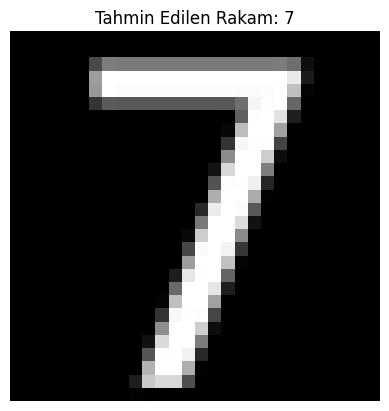

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from PIL import Image, ImageOps
import cv2

# MNIST veri setini yükle ve hazırla
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Veriyi normalize et ve yeniden şekillendir
x_train = x_train / 255.0
x_test = x_test / 255.0
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Modeli oluştur
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Modeli derle
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Modeli eğit
model.fit(x_train, y_train, epochs=2, validation_data=(x_test, y_test))

# Modelin doğruluğunu test et
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Doğruluğu: {accuracy:.2f}")

# Kullanıcıdan bir görsel yüklemesini iste
uploaded = files.upload()

for file_name in uploaded.keys():
    # Görseli aç ve işleme al
    img = Image.open(file_name).convert('L')  # Siyah-beyaza çevir
    img = ImageOps.invert(img)  # Renkleri ters çevir (arka plan siyah, rakam beyaz olmalı)
    img = img.resize((28, 28))  # Yeniden boyutlandır
    img_array = np.array(img) / 255.0  # Normalize et
    img_array = img_array.reshape(-1, 28, 28, 1)

    # Tahmin yap
    prediction = model.predict(img_array)
    predicted_digit = np.argmax(prediction)

    # Sonuçları göster
    plt.imshow(img, cmap='gray')
    plt.title(f"Tahmin Edilen Rakam: {predicted_digit}")
    plt.axis('off')
    plt.show()
